In [2]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
!pip install sentence_transformers
from sklearn.preprocessing import FunctionTransformer
from sentence_transformers import SentenceTransformer
from sklearn.datasets import fetch_20newsgroups

# Fonction pour effectuer la réduction de dimension avec t-SNE
def dim_red(X, n_components):
    tsne = TSNE(n_components=n_components)
    return tsne.fit_transform(X)

# Fonction pour effectuer le clustering avec k-means
def clust(X, k):
    kmeans = KMeans(n_clusters=k)
    return kmeans.fit_predict(X)

# Wrapper pour utiliser la fonction dans le pipeline
tsne_transformer = FunctionTransformer(dim_red, kw_args={'n_components': 3})

# Import des données
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]

# Modèle d'embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

# Pipeline avec t-SNE et k-means
pipeline = make_pipeline(tsne_transformer, KMeans(n_clusters=len(set(labels))))

# Ajustement du modèle
pipeline.fit(embeddings)

# Prédiction des clusters
pred = pipeline.predict(embeddings)

# Évaluation des résultats de clustering
nmi_score = normalized_mutual_info_score(pred, labels)
ari_score = adjusted_rand_score(pred, labels)

print(f'NMI: {nmi_score:.2f} \nARI: {ari_score:.2f}')

C:\Users\PC\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


NMI: 0.38 
ARI: 0.19


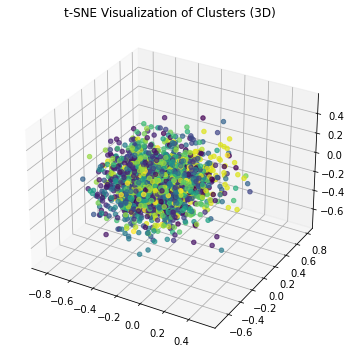

C:\Users\PC\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


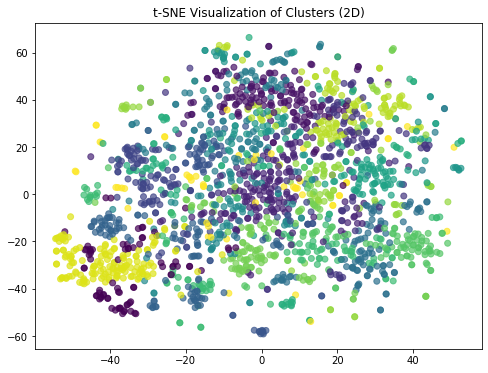

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], c=pred, cmap='viridis', alpha=0.7)
ax.set_title('t-SNE Visualization of Clusters (3D)')
plt.show()

# Visualize the 2D clusters using t-SNE
tsne_2d = TSNE(n_components=2)
embeddings_2d = tsne_2d.fit_transform(embeddings)

plt.figure(figsize=(8, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=pred, cmap='viridis', alpha=0.7)
plt.title('t-SNE Visualization of Clusters (2D)')
plt.show()

In [5]:
cluster_counts = np.bincount(pred)

# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(range(len(cluster_counts)), cluster_counts, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points in Each Cluster')
plt.show()

NameError: name 'np' is not defined

C:\Users\PC\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


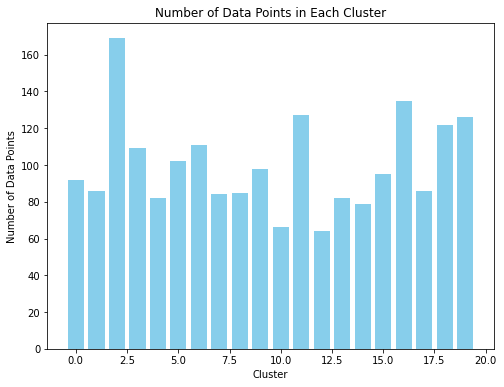

In [7]:
pred = pipeline.predict(embeddings)
import numpy as np
# Bar chart for cluster distribution
cluster_counts = np.bincount(pred)
plt.figure(figsize=(8, 6))
plt.bar(range(len(cluster_counts)), cluster_counts, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points in Each Cluster')
plt.show()